# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [36]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [37]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [38]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [39]:
# output data types
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

<code>Output shows there are no Object types within the data</code>

In [40]:
# Check for missing values
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<code>No nulls</codes>

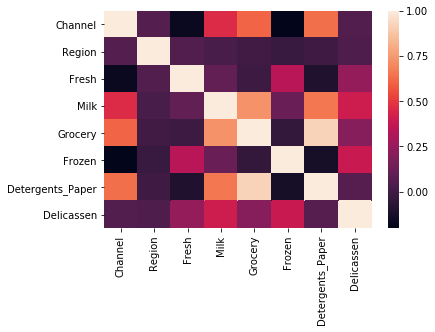

In [41]:
# column collinearity
sns.heatmap(customers.corr())

In [42]:
# we set correlation threshold to 0.90
threshold = 0.90

def captureCollinear(mat = customers.corr(),thresh = threshold):
    '''
    returns a list of lists containing possible collinear column
    pairs and their correlation values
    '''
    colPairs = []
    for column in mat.columns.values:
        # correlation value for column and col2
        corr = mat[column].sort_values(ascending = False)[1]
        col2 = mat[column].sort_values(ascending = False).index[1]
        # checks if columns are the same, if not store values
        if (corr >= threshold) and (col2 is not column):
            colPairs.append([column, col2, corr])
    return colPairs
        

In [43]:
# return columns with high correlation to each other
captureCollinear()

[['Grocery', 'Detergents_Paper', 0.9246406908542681],
 ['Detergents_Paper', 'Grocery', 0.9246406908542681]]

In [44]:
# Your observations here
# 'Detergents_Paper' is dropped and 'Grocery' is kept in its place.
#customers.drop('Detergents_Paper', axis = 1, inplace = True)

In [45]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


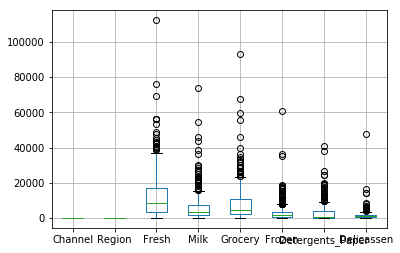

In [46]:
# Descriptive Stats
customers.boxplot()

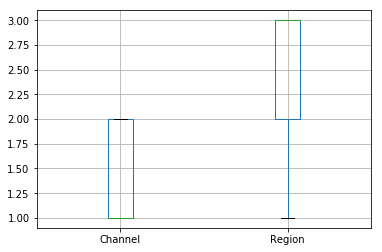

In [47]:
# looking at Channel and Region exclusively
customers.boxplot(column = ['Channel', 'Region'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc825b8d940>,
      dtype=object)

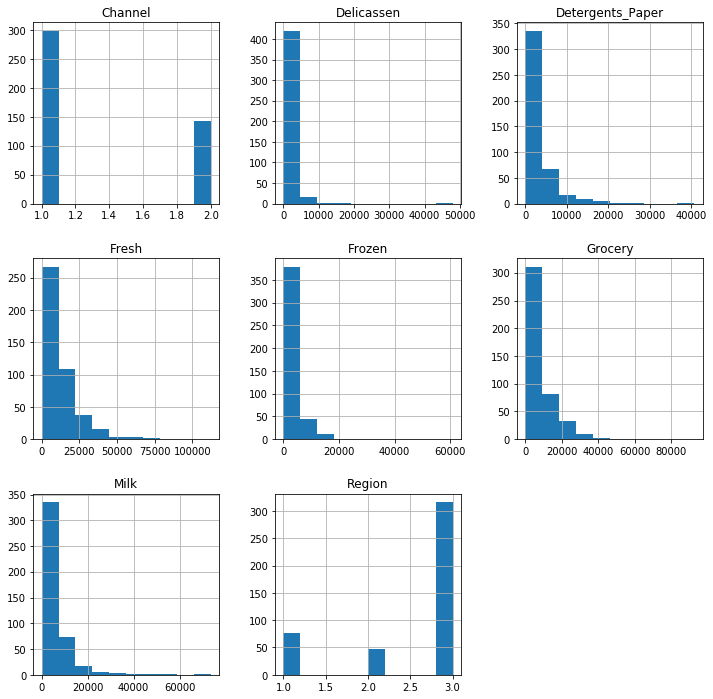

In [48]:
customers.hist(figsize=(12,12))


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here


In [ ]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [50]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customers_scale = StandardScaler().fit_transform(customers)
customers_scale

/home/fred/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/fred/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [54]:
# Your code here:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

X = customers_scale
# set a range of 1-10 for k values to visualize
K = range(1,10)

def elbowPlot(X = X, K = K):
    distortions = []
    for k in K:
        k_means_model = KMeans(n_clusters=k).fit(X)
        k_means_model.fit(X)
        distortions.append(sum(np.min(cdist(X,
                                            k_means_model.cluster_centers_,
                                            'euclidean'), axis=1)) / X.shape[0])
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

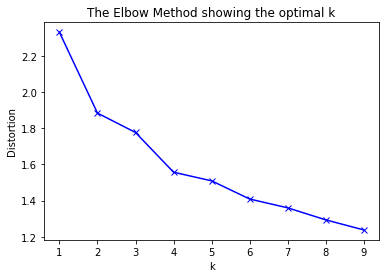

In [55]:
elbowPlot()

Count the values in `labels`.

In [76]:
# Your code here:
from sklearn.metrics import silhouette_score
# n_clusters = 4
k_means_model = KMeans(n_clusters = 4).fit(X)

silhouette_score(X, k_means_model.fit_predict(X))

0.34819485747460033

In [77]:
customers['labels'] = k_means_model.fit_predict(X)
customers['labels'].value_counts()

0    210
2    125
3     92
1     13
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [81]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5).fit(X)
customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [83]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

[Text(0.5, 0, 'Detergents_Paper')]

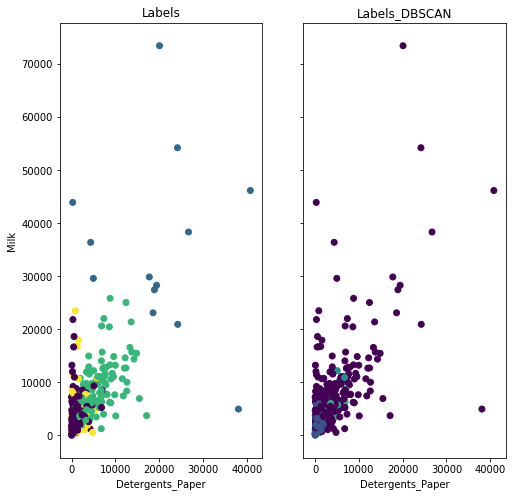

In [134]:
# Your code here:
X = customers['Detergents_Paper']
y = customers['Milk']

import matplotlib.pyplot as plt 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True, figsize = (8,8))
ax1.scatter(X, y, marker = 'o', c=customers['labels'])
ax1.set_title('Labels')
ax1.set(xlabel = 'Detergents_Paper', ylabel = 'Milk')
ax2.scatter(X, y, marker = 'o', c=customers['labels_DBSCAN'])
ax2.set_title('Labels_DBSCAN')
ax2.set(xlabel = 'Detergents_Paper')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

[Text(0.5, 0, 'Grocery')]

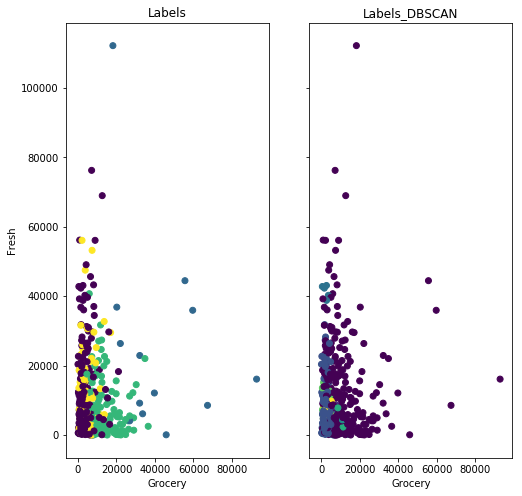

In [135]:
# Your code here:
X = customers['Grocery']
y = customers['Fresh']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True, figsize = (8,8))
ax1.scatter(X, y, marker = 'o', c=customers['labels'])
ax1.set_title('Labels')
ax1.set(xlabel = 'Grocery', ylabel = 'Fresh')
ax2.scatter(X, y, marker = 'o', c=customers['labels_DBSCAN'])
ax2.set_title('Labels_DBSCAN')
ax2.set(xlabel = 'Grocery')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

[Text(0.5, 0, 'Frozen')]

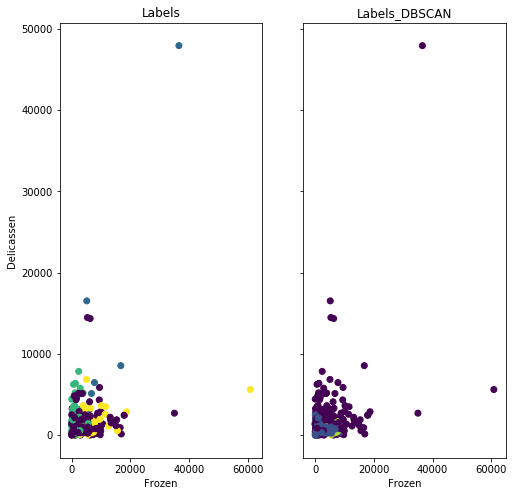

In [136]:
# Your code here:
X = customers['Frozen']
y = customers['Delicassen']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True, figsize = (8,8))
ax1.scatter(X, y, marker = 'o', c=customers['labels'])
ax1.set_title('Labels')
ax1.set(xlabel = 'Frozen', ylabel = 'Delicassen')
ax2.scatter(X, y, marker = 'o', c=customers['labels_DBSCAN'])
ax2.set_title('Labels_DBSCAN')
ax2.set(xlabel = 'Frozen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [143]:
# Your code here:
customers.groupby('labels').agg('mean').T[:-1]

labels,0,1,2,3
Channel,1.004762,1.846154,2.000,1.054348
Region,3.000000,2.615385,2.672,1.315217
Fresh,13423.571429,25770.769231,7877.640,12407.130435
Milk,3172.000000,35160.384615,8913.512,3401.771739
Grocery,3746.371429,41977.384615,14212.624,4234.130435
Frozen,3427.100000,6844.538462,1339.280,4082.282609
Detergents_Paper,768.219048,19867.384615,6149.592,864.739130
Delicassen,1267.142857,7880.307692,1537.168,1198.402174


In [144]:
customers.groupby('labels_DBSCAN').agg('mean').T[:-1]

labels_DBSCAN,-1,0,1,2,3,4,5,6,7
Channel,1.490196,2.0,1.000000,1.0,2.0,2.000000,1.000000,1.000000,1.0
Region,2.450980,3.0,3.000000,3.0,3.0,3.000000,1.000000,1.000000,2.0
Fresh,13729.564706,11401.0,9128.823077,41446.6,2357.2,3068.142857,9837.863636,6823.000000,7494.6
Milk,8359.886275,3536.2,1862.438462,1421.2,10224.8,6095.857143,1751.863636,1943.000000,1537.6
Grocery,11484.364706,6729.0,2423.530769,2167.6,11862.8,10355.000000,2161.681818,2372.666667,3383.0
Frozen,3795.003922,720.2,2131.430769,1276.4,609.6,994.000000,1513.181818,6780.333333,2575.4
Detergents_Paper,4356.800000,3561.0,496.576923,416.2,5780.0,4675.571429,333.954545,386.500000,227.4
Delicassen,2080.470588,258.2,741.946154,784.8,572.8,1826.428571,669.045455,613.666667,941.0


Which algorithm appears to perform better?

In [ ]:
# Your observations here
# k-means, whereas the clustering seems less refined using DBSCAN given that the differences in 
# mean begins to drop off with the addition of clusters

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

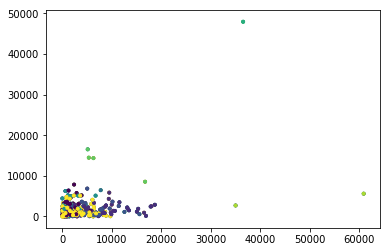

In [153]:
# Your code here
# K is range(1,10) by default

for k in K:
    k_means_model = KMeans(n_clusters=k).fit(customers_scale)
    customers['labels'] = k_means_model.fit_predict(customers_scale)
    dbscan = DBSCAN(eps = 0.5).fit(customers_scale)
    customers['labels_DBSCAN'] = dbscan.labels_
    plt.scatter(X, y, k,  marker = 'o', c = customers['labels'])

In [150]:
# Your comment here


0        214
1       1762
2       2405
3       6404
4       3915
5        666
6        480
7       1669
8        425
9       1159
10      4400
11      1420
12       287
13      3095
14       294
15       397
16       134
17       839
18      2205
19       669
20      1066
21      3383
22      9408
23      5154
24      2915
25       201
26      3151
27       485
28      1158
29      1200
       ...  
410     1389
411     1535
412       98
413    17866
414     5679
415     1691
416      848
417      364
418      133
419      633
420       25
421     1031
422      830
423     1059
424      874
425    15348
426     3141
427    15082
428     2198
429       47
430      575
431    13486
432      269
433     1541
434      688
435    13135
436     4510
437      437
438     1038
439       65
Name: Frozen, Length: 440, dtype: int64

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here